In [265]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Step 1. Load dataset

We use pandas to import our traning and test datasets, then we'll try to understand the data. 

In [296]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

print('Train shape:',train.shape)
print('Test shape:', test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [297]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [298]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary 

 * Rows and columns :  We can see that there are 891 rows and 12 columns in our training set. Test set contains 418 rows and 11 columns.
   
| Variable    | Definition                             | Key                                         |
|-------------|----------------------------------------|---------------------------------------------|
| survival    | Survival                               | 0 = No, 1 = Yes                             |
| pclass      | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex         | Sex                                    |                                             |
| Age         | Age in years                           |                                             |
| sibsp       | # of siblings / spouses aboard the Titanic |                                             |
| parch       | # of parents / children aboard the Titanic |                                             |
| ticket      | Ticket number                          |                                             |
| fare        | Passenger fare                         |                                             |
| cabin       | Cabin number                           |                                             |
| embarked    | Port of Embarkation                    





## Step 2. Preprocess data and Feature engineering
Feature engineering is the process of using domain knowledge to create new features or transform existing features in a dataset to improve the performance of a machine learning model. For the Titanic dataset, which is often used for binary classification (predicting survival or not), feature engineering can significantly impact model performance.

Now we'll try to analyze the input to see if we need some preprocessing steps in our data:

* Descriptive Statistics. Use `train.describe()` to see the statistical properties of the data
* Handle missing values. Find missing values using `train.isnull().sum`. 
* Encode categorical variables. We use `train['column_name'].map()` function to map a categorical features to numeric.
* Remove unneccesary columns.
* Scale numerical features
* Prepare data for modeling (X_train, Y_train, X_test, Y_test).

In [299]:
# Descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [300]:
# Handle missing values, train set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [301]:
# Median imputation for 'Age'
train['Age'] = train['Age'].fillna(train.groupby(['Sex', 'Pclass'])['Age'].transform('median'))
train['Fare'] = train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"))
train.head(50)

#Remove 'Cabin' column, too many missing values
train.drop(columns=['Cabin'], inplace = True)

#Fill missing values to 'Embarked' with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [302]:
# Handle missing values, test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [303]:
# Median imputation for 'Age'
test['Age'] = test['Age'].fillna(train.groupby(['Sex', 'Pclass'])['Age'].transform('median'))
test['Fare'] = test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"))

#Remove 'Cabin' column, too many missing values
test.drop(columns=['Cabin'], inplace = True)

#Fill missing values to 'Embarked' with mode
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [304]:
#Map categorical features to numbers
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [305]:
#Scale numerical features

scaler = StandardScaler()
train['Fare'] = scaler.fit_transform(train[['Fare']])
test['Fare']  = scaler.fit_transform(test[['Fare']])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502445,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786845,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488854,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420730,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486337,0


In [306]:
# Remove unneccesary columns
train.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,-0.502445,0
1,1,1,1,38.0,1,0,0.786845,1
2,1,3,1,26.0,0,0,-0.488854,0
3,1,1,1,35.0,1,0,0.420730,0
4,0,3,0,35.0,0,0,-0.486337,0


### Step 3. Data visualization 

In [258]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

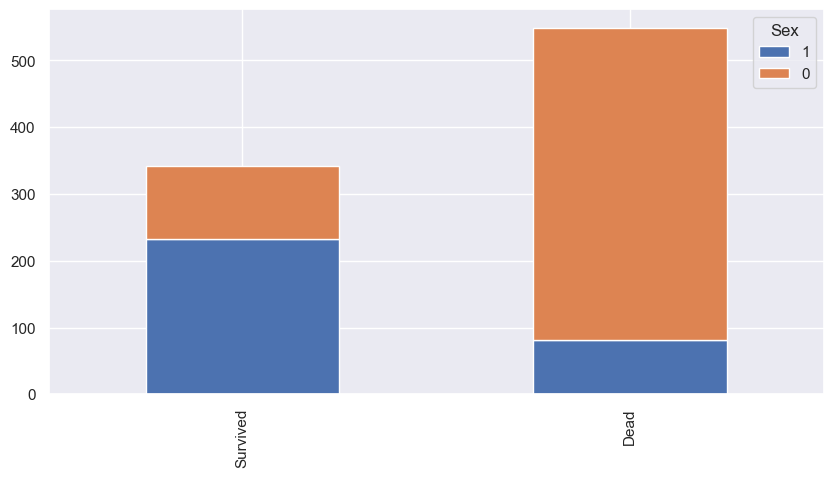

In [259]:
bar_chart('Sex')

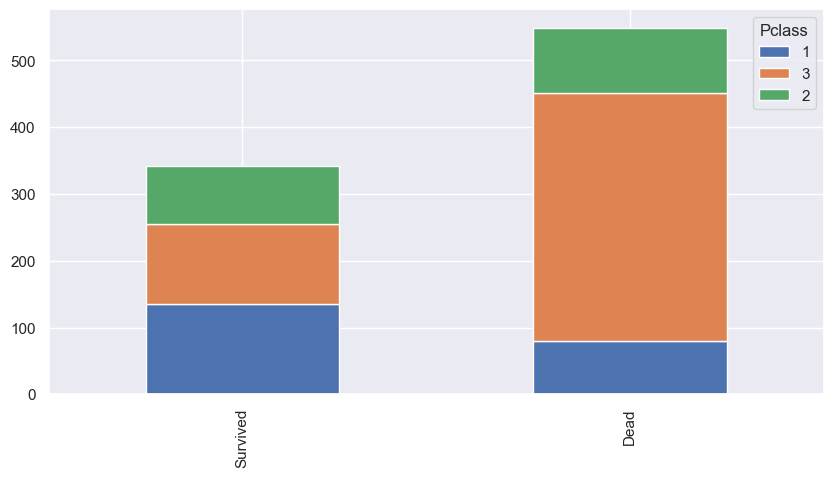

In [260]:
bar_chart('Pclass')

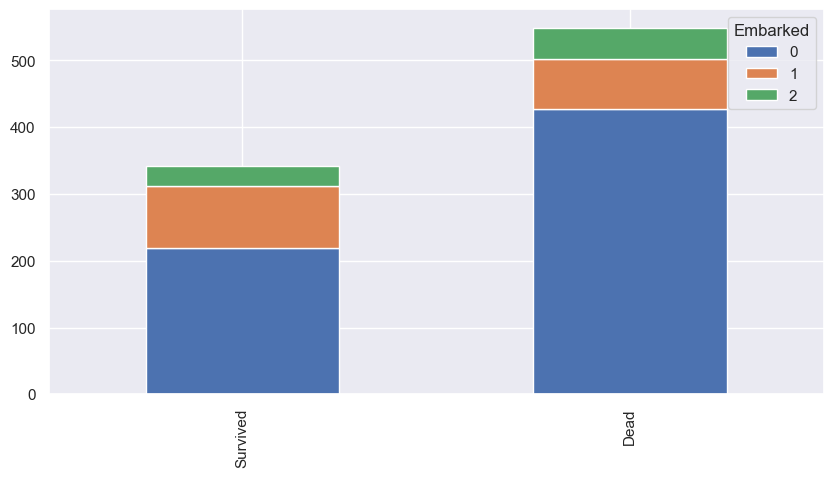

In [262]:
bar_chart('Embarked')

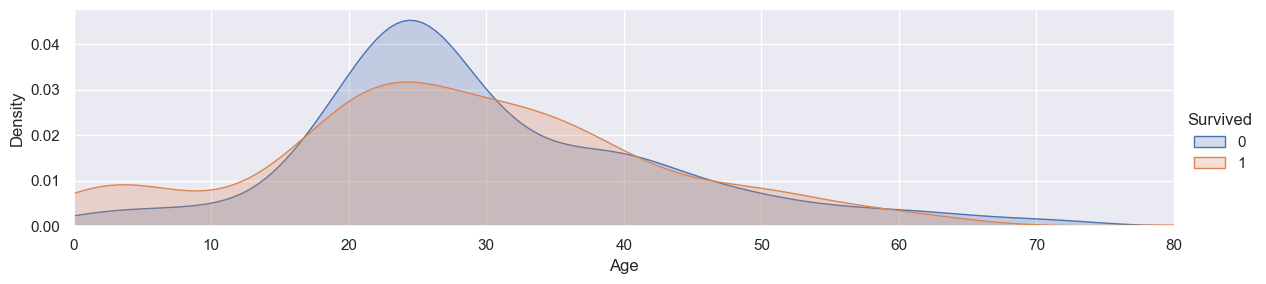

In [263]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 